# 서울시 업무추진비(2016~2018)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 폰트설정
plt.rcParams['font.family'] = 'NanumBarunGothic'
print (plt.rcParams['font.family'] )

['NanumBarunGothic']


In [2]:
df = pd.read_csv('data/seoul_city_hall_expense.csv')
df.shape

(159600, 20)

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,exec_dt,exec_loc,target_nm,payment_method,exec_amount
0,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-30 12:27,매일한우타운식당(광시면 예당로길),시정 청년정책 관련 업무협의 간담회,시장 등 12명,카드,250000
1,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-30 08:28,청암회관(예산군 덕산면),"시정 충남, 전북 현장 방문 관련 업무협의",시장 등 6명,카드,72000
2,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-29 20:06,태원(서구 문정로),시정 지방자치단체 협력 관련 업무협의,시장 등 3명,카드,107500
3,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-29 12:33,고릴라(세종 절재로),시정 교류 및 협력 관련 업무협의,시장 등 6명,카드,190000
4,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-28 00:00,서울시청매점,방문민원 등 접대용품 구입,NaN,카드,485000


In [4]:
# 컬럼 이름에 누락이 있다. 앞에 2개가 빈 이름으로 들어가 있는데 누락된 컬럼을 채워준다.
len(df.columns)

20

In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'nid', 'title', 'url', 'dept_nm_lvl_1',
       'dept_nm_lvl_2', 'dept_nm_lvl_3', 'dept_nm_lvl_4', 'dept_nm_lvl_5',
       'exec_yr', 'exec_month', 'expense_budget', 'expense_execution',
       'category', 'exec_dt', 'exec_loc', 'target_nm', 'payment_method',
       'exec_amount'],
      dtype='object')

* 사이트에 있는 이름과 동일한 이름으로 변경해 준다.
* 연번	구분	부서명	집행일시	집행장소	집행목적	대상인원	결제방법	집행금액

In [6]:
df.columns = ['nid', 'title', 'url', 'dept_nm_lvl_1',
       'dept_nm_lvl_2', 'dept_nm_lvl_3', 'dept_nm_lvl_4', 'dept_nm_lvl_5',
       '집행연', '집행월', 'expense_budget', 'expense_execution',
       '집행목적', '부서명', '집행일시', 'exec_loc', '집행내용', '대상인원', '결제방법',
       '집행금액']

In [7]:
df.head()

,nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,집행연,집행월,expense_budget,expense_execution,집행목적,부서명,집행일시,exec_loc,집행내용,대상인원,결제방법,집행금액
0,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-30 12:27,매일한우타운식당(광시면 예당로길),시정 청년정책 관련 업무협의 간담회,시장 등 12명,카드,250000
1,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-30 08:28,청암회관(예산군 덕산면),"시정 충남, 전북 현장 방문 관련 업무협의",시장 등 6명,카드,72000
2,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-29 20:06,태원(서구 문정로),시정 지방자치단체 협력 관련 업무협의,시장 등 3명,카드,107500
3,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-29 12:33,고릴라(세종 절재로),시정 교류 및 협력 관련 업무협의,시장 등 6명,카드,190000
4,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-28 00:00,서울시청매점,방문민원 등 접대용품 구입,NaN,카드,485000


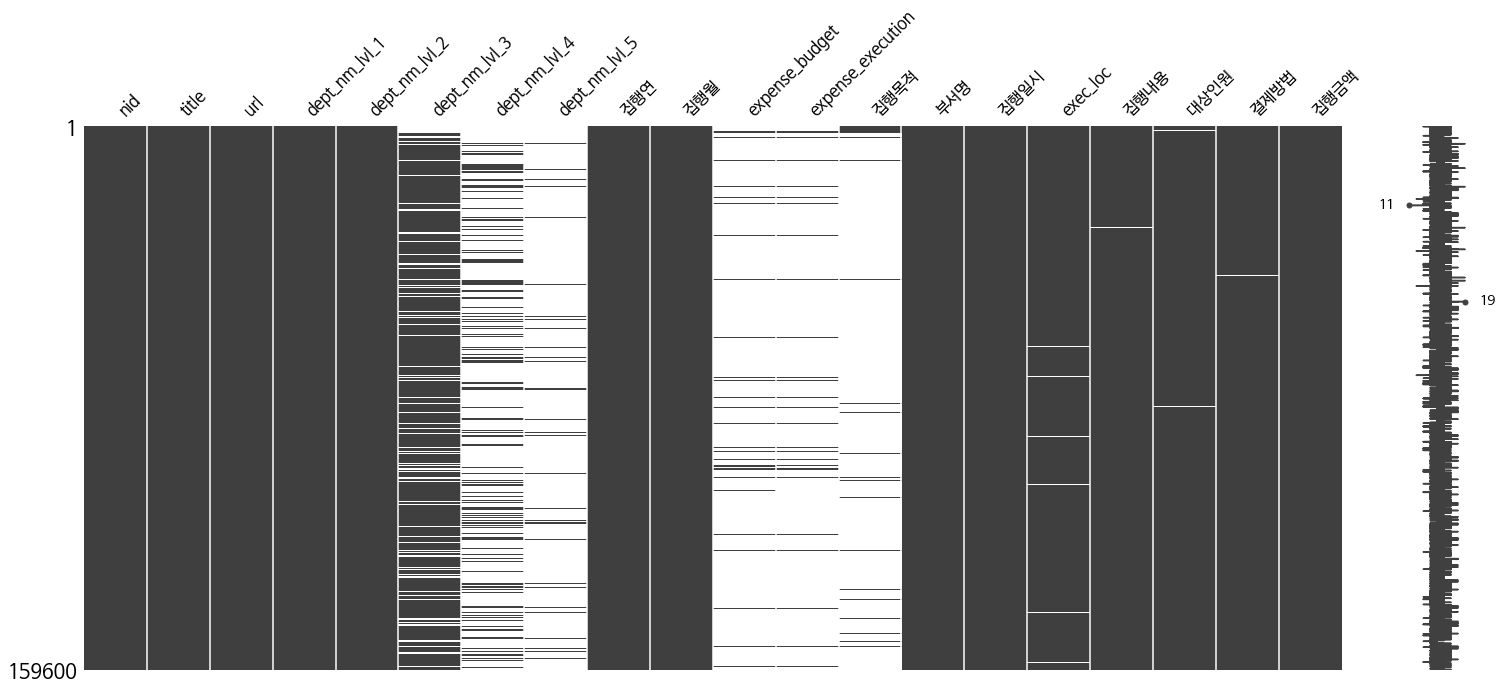

In [8]:
import missingno as msno

msno.matrix(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159600 entries, 0 to 159599
Data columns (total 20 columns):
nid                  159600 non-null int64
title                159600 non-null object
url                  159600 non-null object
dept_nm_lvl_1        159600 non-null object
dept_nm_lvl_2        159583 non-null object
dept_nm_lvl_3        136718 non-null object
dept_nm_lvl_4        39828 non-null object
dept_nm_lvl_5        7499 non-null object
집행연                  159600 non-null int64
집행월                  159600 non-null int64
expense_budget       7934 non-null float64
expense_execution    6940 non-null float64
집행목적                 6741 non-null object
부서명                  159502 non-null object
집행일시                 159600 non-null object
exec_loc             157843 non-null object
집행내용                 159578 non-null object
대상인원                 158439 non-null object
결제방법                 159387 non-null object
집행금액                 159600 non-null int64
dtypes: float64(2), 

In [10]:
df["dept_nm_lvl_1"].value_counts()

서울시본청          98699
사업소            36826
소방재난본부(소방서)    16631
의회사무처           7444
Name: dept_nm_lvl_1, dtype: int64

In [11]:
# 집행일시가 object 타입이다. 전처리를 위해 타입을 변경해 준다.
df["집행일시"] = pd.to_datetime(df["집행일시"])

In [12]:
df["집행요일"] = df["집행일시"].dt.dayofweek

In [13]:
weekday_map= {0:'월', 1:'화', 2:'수', 3:'목',
              4:'금', 5:'토', 6:'일'}

In [14]:
df["요일"] = df["집행요일"].apply(lambda x : weekday_map[x])
df["요일"].head()

0    토
1    토
2    금
3    금
4    목
Name: 요일, dtype: object

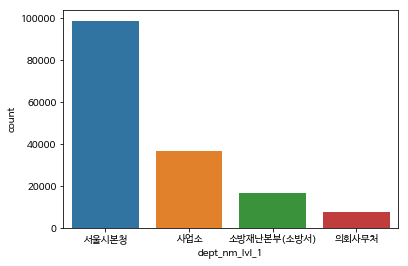

In [15]:
sns.countplot(data=df, x="dept_nm_lvl_1")

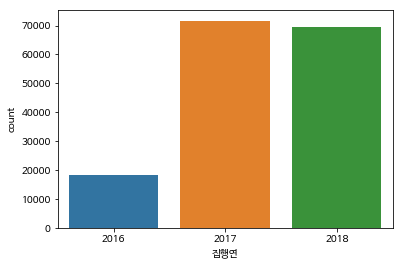

In [16]:
sns.countplot(data=df, x="집행연")

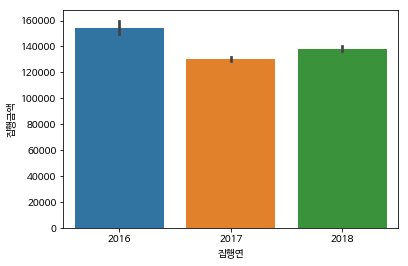

In [17]:
# 연도별 평균 집행금액
sns.barplot(data=df, x='집행연', y='집행금액')

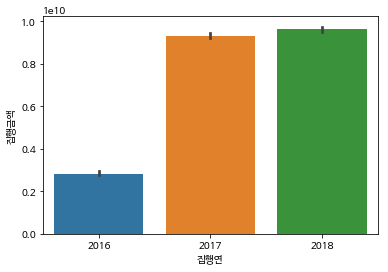

In [18]:
# 연도별 집행금액 합계
sns.barplot(data=df, x='집행연', y='집행금액', estimator=np.sum)

In [19]:
df["집행연월"] =  df["집행연"].astype(str) + "-" + df["집행월"].astype(str)

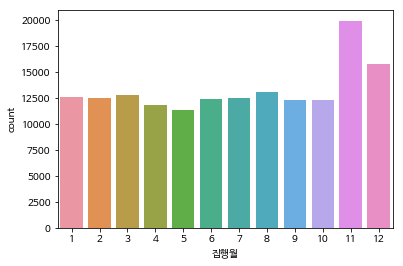

In [20]:
sns.countplot(data=df, x="집행월")

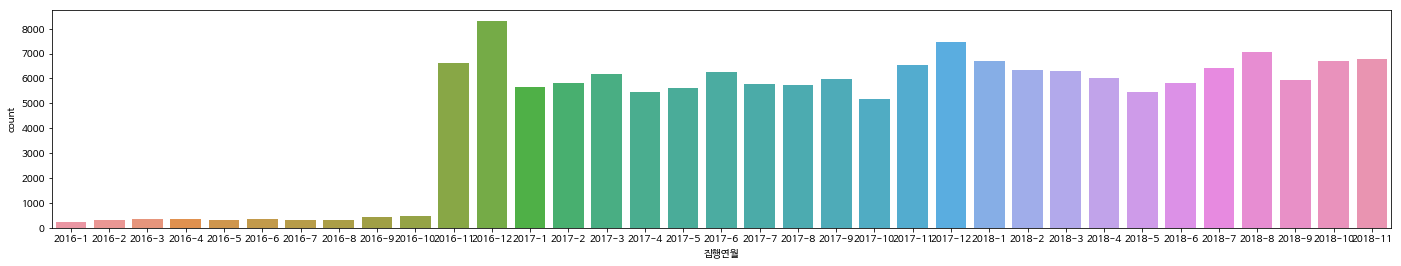

In [21]:
plt.figure(figsize=(24,4))
sns.countplot(data=df, x="집행연월")

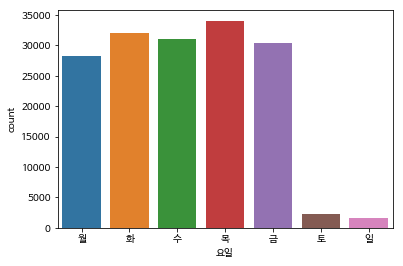

In [22]:
sns.countplot(data=df.sort_values(by="집행요일"), x="요일")

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [24]:
text = ' '.join(df['집행내용'].fillna(''))

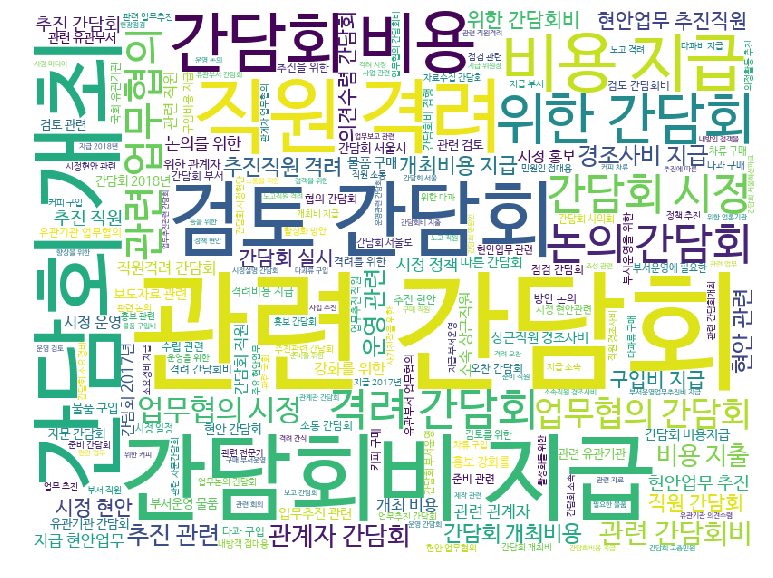

In [25]:
displayWordCloud(text)